In [8]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# Load the Iris dataset
iris = load_iris()
X = iris.data


# Scale the features (important for distance-based algorithms)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform K-Means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# Create a DataFrame for results
df = pd.DataFrame(X_scaled, columns=iris.feature_names)
df['Cluster'] = clusters

# print(df)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [14]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Sample Mall Customers dataset (subset for demo; load full CSV in practice)
data = {
    'CustomerID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Gender': ['Male', 'Female', 'Female', 'Female', 'Male', 'Female', 'Female', 'Male', 'Male', 'Female'],
    'Age': [19, 21, 20, 23, 31, 22, 35, 23, 64, 31],
    'Annual_Income': [15, 15, 16, 16, 17, 17, 18, 18, 19, 19],
    'Spending_Score': [39, 81, 6, 77, 40, 76, 6, 94, 3, 72]
}
df = pd.DataFrame(data)

# Preprocess: Encode gender (Male=1, Female=0), select numeric features
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
features = ['Gender', 'Age', 'Annual_Income', 'Spending_Score']
X = df[features]

# Scale features for better clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-Means with 3 clusters (adjust via elbow method)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)


print("Clustered Data:")
print(df)
print("\nCluster Centers (scaled):")
print(kmeans.cluster_centers_)
print(f"\nInertia: {kmeans.inertia_}")

Clustered Data:
   CustomerID  Gender  Age  Annual_Income  Spending_Score  Cluster
0           1       1   19             15              39        0
1           2       0   21             15              81        0
2           3       0   20             16               6        0
3           4       0   23             16              77        0
4           5       1   31             17              40        1
5           6       0   22             17              76        0
6           7       0   35             18               6        1
7           8       1   23             18              94        1
8           9       1   64             19               3        2
9          10       0   31             19              72        1

Cluster Centers (scaled):
[[-0.40824829 -0.61784779 -0.84852814  0.1922312 ]
 [ 0.20412415  0.08602944  0.70710678  0.10813005]
 [ 1.22474487  2.74512117  1.41421356 -1.39367621]]

Inertia: 18.252160082838532


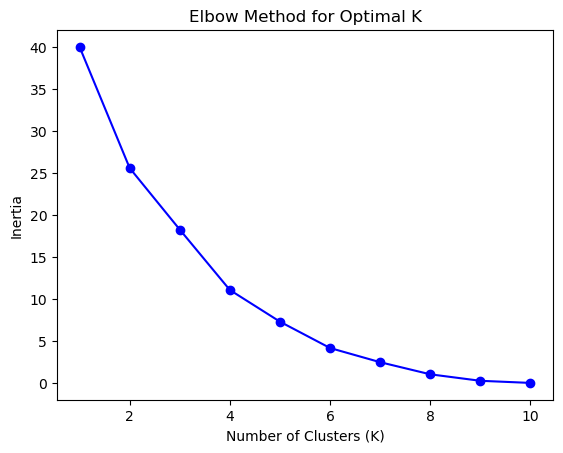

In [15]:
import matplotlib.pyplot as plt

inertias = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.plot(K_range, inertias, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()


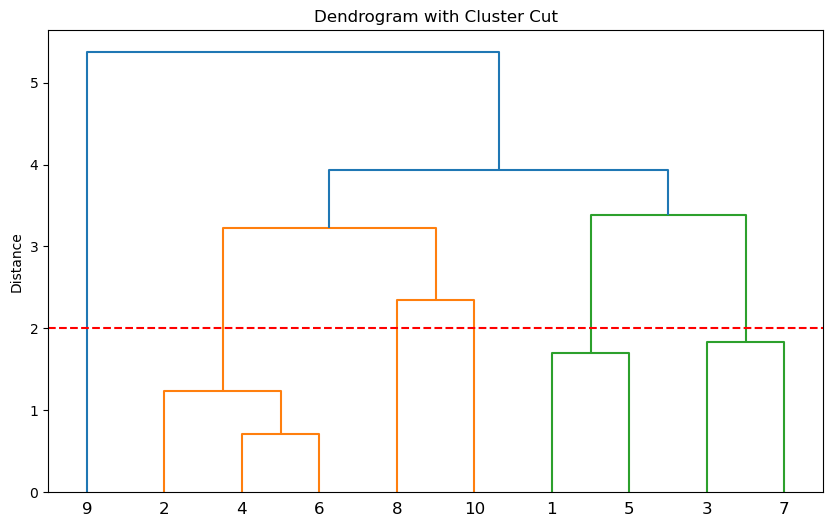

Clusters after dissection:    CustomerID  Hier_Cluster
0           1             4
1           2             1
2           3             5
3           4             1
4           5             4
5           6             1
6           7             5
7           8             2
8           9             6
9          10             3


In [16]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt

# From previous customer data (X_scaled ready)
Z = linkage(X_scaled, 'ward')  # Linkage matrix

plt.figure(figsize=(10, 6))
dendrogram(Z, labels=df['CustomerID'].values)
plt.axhline(y=2.0, color='r', linestyle='--')  # Dissection line
plt.title('Dendrogram with Cluster Cut')
plt.ylabel('Distance')
plt.show()

# Extract clusters by cutting at height=2.0
clusters = fcluster(Z, t=2.0, criterion='distance')
df['Hier_Cluster'] = clusters
print("Clusters after dissection:", df[['CustomerID', 'Hier_Cluster']])
